# HEX algorithm **Kopuru Vespa Velutina Competition**

Purpose: to predict the yearly amount of Vespa Velutina Wasp nests in each of Biscay's municipalities.

Output: WaspBusters' prediction for submission to Kopuru *(WaspBusters_2021MMDD_batchNAME.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Get the data

In [5]:
# Base packages -----------------------------------
import pandas as pd
import numpy as np

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# SKLearn -----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Naive Bayes -------------------------------------
from sklearn.naive_bayes import GaussianNB

In [21]:
QUEEN_train = pd.read_csv('WBds03_QUEENtrain.csv', sep=',')
QUEEN_predict = pd.read_csv('WBds03_QUEENpredict.csv', sep=',')

## Ready the data

In [22]:
QUEEN_train.columns

Index(['year_x', 'municip_name', 'species', 'municip_code', 'month',
       'year_offset', 'waspbust_id', 'colonies_amount', 'food_fruit',
       'food_apple', 'food_txakoli', 'food_kiwi', 'food_pear',
       'food_blueberry', 'food_raspberry', 'station_code', 'index', 'MMM',
       'station_name', 'weath_days_frost', 'weath_humidity', 'weath_maxLevel',
       'weath_midLevel', 'weath_minLevel', 'weath_days_rain',
       'weath_days_rain1mm', 'weath_accuRainfall', 'weath_10minRainfall',
       'weath_1dayRainfall', 'weath_solar', 'weath_meanTemp', 'weath_maxTemp',
       'weath_maxMeanTemp', 'weath_minTemp', 'weath_meanWindM',
       'weath_maxWindM', 'weath_meanDayMaxWind', 'population'],
      dtype='object')

In [23]:
QUEEN_predict.columns

Index(['year_x', 'municip_name', 'species', 'municip_code', 'month',
       'year_offset', 'colonies_amount', 'food_fruit', 'food_apple',
       'food_txakoli', 'food_kiwi', 'food_pear', 'food_blueberry',
       'food_raspberry', 'station_code', 'index', 'MMM', 'station_name',
       'weath_days_frost', 'weath_humidity', 'weath_maxLevel',
       'weath_midLevel', 'weath_minLevel', 'weath_days_rain',
       'weath_days_rain1mm', 'weath_accuRainfall', 'weath_10minRainfall',
       'weath_1dayRainfall', 'weath_solar', 'weath_meanTemp', 'weath_maxTemp',
       'weath_maxMeanTemp', 'weath_minTemp', 'weath_meanWindM',
       'weath_maxWindM', 'weath_meanDayMaxWind', 'population'],
      dtype='object')

In [33]:
# making the dataframe model-ready:

#QUEEN_train['year_offset'] = pd.to_datetime(QUEEN_train['year_offset'])
#QUEEN_train['nest_foundDate'] = pd.to_datetime(QUEEN_train['nest_foundDate'])
#QUEEN_train['municip_name'] = QUEEN_train.municip_name.astype('category')
#QUEEN_train['municip_code'] = QUEEN_train.municip_code.astype(int) 
#QUEEN_train['species'] = QUEEN_train.species.astype('category')
#QUEEN_train['nest_locType'] = QUEEN_train.nest_locType.astype('category')

#QUEEN_train['nest_status'] = QUEEN_train.nest_status.astype('category')

#QUEEN_train['station_code'] = QUEEN_train.station_code.astype('category')
#QUEEN_train['month'] = QUEEN_train.month.astype('category')

#QUEEN_train.dtypes

In [17]:
QUEEN_predict.head()

,year_x,municip_name,species,municip_code,month,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,...,weath_1dayRainfall,weath_solar,weath_meanTemp,weath_maxTemp,weath_maxMeanTemp,weath_minTemp,weath_meanWindM,weath_maxWindM,weath_meanDayMaxWind,population
0,2020,AbadiÃ±o,Vespa Velutina,48001,1,2019,160.0,0.0,0.0,0.0,...,50.900000,12.501449,6.100000,16.000000,8.800000,3.40000,10.613883,74.702995,40.082916,7.658
1,2020,Abanto y CiÃ©rvana-Abanto Zierbena,Vespa Velutina,48002,1,2019,161.0,0.0,0.0,0.0,...,46.400000,12.469076,7.300000,16.100000,9.700000,5.00000,13.100000,83.200000,44.100000,9.471
2,2020,Ajangiz,Vespa Velutina,48911,1,2019,0.0,17.0,1.0,3.0,...,44.700000,12.489361,7.100000,17.800000,10.800000,3.60000,10.907054,74.867805,40.090897,464.000
3,2020,Alonsotegi,Vespa Velutina,48912,1,2019,200.0,7.0,0.0,1.0,...,25.971838,12.523187,13.058211,26.286543,18.125679,8.55126,10.850284,74.898141,40.134479,2.879
4,2020,Amorebieta-Etxano,Vespa Velutina,48003,1,2019,267.0,0.0,0.0,0.0,...,49.900000,12.508962,6.300000,17.200000,9.700000,3.50000,10.969435,74.587126,40.143607,19.529


## Determine Feature Importance

In [24]:
QUEEN_train_X = QUEEN_train.drop(columns = ['waspbust_id', 'species', 'municip_name', 'station_code', 'MMM', 'station_name', 'index'])
QUEEN_train_X

,year_x,municip_code,month,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,...,weath_1dayRainfall,weath_solar,weath_meanTemp,weath_maxTemp,weath_maxMeanTemp,weath_minTemp,weath_meanWindM,weath_maxWindM,weath_meanDayMaxWind,population
0,2018,48001.0,1,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,63.1,12.452224,4.3,16.8,8.5,0.8,10.349610,82.102336,40.167811,7.533
1,2018,48001.0,2,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,24.4,12.549345,9.5,17.9,14.8,4.6,10.267276,75.442306,40.125148,7.533
2,2018,48001.0,3,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,23.0,12.526446,11.1,27.5,16.8,6.0,10.096320,74.288904,40.108287,7.533
3,2018,48001.0,5,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,40.5,12.460106,16.7,35.5,23.9,10.2,10.573962,72.719699,40.122893,7.533
4,2018,48001.0,6,2017,160.0,0.0,0.0,0.0,0.0,0.0,...,18.0,12.548247,19.0,38.4,25.1,14.1,11.004038,73.728702,40.190008,7.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2019,48913.0,8,2018,0.0,13.0,0.0,0.0,4.0,0.0,...,10.1,12.480537,20.9,32.7,23.6,18.0,14.400000,94.300000,39.900000,1.490
1633,2019,48913.0,11,2018,0.0,13.0,0.0,0.0,4.0,0.0,...,15.6,12.372826,13.7,22.6,16.9,10.7,19.700000,125.300000,63.500000,1.490
1634,2019,48913.0,12,2018,0.0,13.0,0.0,0.0,4.0,0.0,...,7.2,12.428883,12.5,19.8,15.6,9.7,18.300000,90.000000,49.800000,1.490
1635,2019,48915.0,1,2018,0.0,21.0,11.0,0.0,0.0,0.0,...,49.7,12.495399,8.0,18.5,12.3,4.5,10.880575,77.503281,40.095269,413.000


In [25]:
QUEEN_train_X.dtypes

year_x                    int64
municip_code            float64
month                     int64
year_offset               int64
colonies_amount         float64
food_fruit              float64
food_apple              float64
food_txakoli            float64
food_kiwi               float64
food_pear               float64
food_blueberry          float64
food_raspberry          float64
weath_days_frost        float64
weath_humidity          float64
weath_maxLevel          float64
weath_midLevel          float64
weath_minLevel          float64
weath_days_rain         float64
weath_days_rain1mm      float64
weath_accuRainfall      float64
weath_10minRainfall     float64
weath_1dayRainfall      float64
weath_solar             float64
weath_meanTemp          float64
weath_maxTemp           float64
weath_maxMeanTemp       float64
weath_minTemp           float64
weath_meanWindM         float64
weath_maxWindM          float64
weath_meanDayMaxWind    float64
population              float64
dtype: o

In [26]:
QUEEN_train_Y = QUEEN_train['waspbust_id']
QUEEN_train_Y

0       1
1       4
2       1
3       3
4       1
       ..
1632    2
1633    1
1634    1
1635    2
1636    3
Name: waspbust_id, Length: 1637, dtype: int64

In [27]:
# Scale the datasets using MinMaxScaler

scalators = QUEEN_train_X.columns
QUEEN_train_X[scalators] = preprocessing.minmax_scale(QUEEN_train_X[scalators])

In [28]:
QUEEN_train_X

,year_x,municip_code,month,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,...,weath_1dayRainfall,weath_solar,weath_meanTemp,weath_maxTemp,weath_maxMeanTemp,weath_minTemp,weath_meanWindM,weath_maxWindM,weath_meanDayMaxWind,population
0,0.0,0.000000,0.000000,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.666302,0.497375,0.160377,0.171642,0.193798,0.099502,0.214050,0.344621,0.311956,0.006558
1,0.0,0.000000,0.090909,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.242888,0.502711,0.405660,0.212687,0.437984,0.288557,0.211477,0.296707,0.311236,0.006558
2,0.0,0.000000,0.181818,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.227571,0.501453,0.481132,0.570896,0.515504,0.358209,0.206135,0.288409,0.310951,0.006558
3,0.0,0.000000,0.363636,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.419037,0.497808,0.745283,0.869403,0.790698,0.567164,0.221061,0.277120,0.311198,0.006558
4,0.0,0.000000,0.454545,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.172867,0.502651,0.853774,0.977612,0.837209,0.761194,0.234501,0.284379,0.312331,0.006558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1.0,0.997812,0.636364,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.086433,0.498931,0.943396,0.764925,0.779070,0.955224,0.340625,0.432374,0.307432,0.000454
1633,1.0,0.997812,0.909091,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.146608,0.493012,0.603774,0.388060,0.519380,0.592040,0.506250,0.655396,0.706081,0.000454
1634,1.0,0.997812,1.000000,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.054705,0.496092,0.547170,0.283582,0.468992,0.542289,0.462500,0.401439,0.474662,0.000454
1635,1.0,1.000000,0.000000,1.0,0.000000,0.076364,0.22,0.0,0.000000,0.0,...,0.519694,0.499747,0.334906,0.235075,0.341085,0.283582,0.230643,0.311534,0.310731,0.416137


In [29]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(QUEEN_train_X, QUEEN_train_Y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (QUEEN_train_X.columns[i],v))

Feature: year_x, Score: -1.01900
Feature: municip_code, Score: -0.38517
Feature: month, Score: 1.69819
Feature: year_offset, Score: -1.01900
Feature: colonies_amount, Score: 0.47397
Feature: food_fruit, Score: 4.89793
Feature: food_apple, Score: -1.52690
Feature: food_txakoli, Score: 1.29954
Feature: food_kiwi, Score: -1.00144
Feature: food_pear, Score: -1.88635
Feature: food_blueberry, Score: 1.63054
Feature: food_raspberry, Score: -0.88958
Feature: weath_days_frost, Score: -0.52464
Feature: weath_humidity, Score: 1.27215
Feature: weath_maxLevel, Score: -1.19007
Feature: weath_midLevel, Score: 3.50546
Feature: weath_minLevel, Score: 1.47727
Feature: weath_days_rain, Score: -0.42133
Feature: weath_days_rain1mm, Score: -1.38411
Feature: weath_accuRainfall, Score: 0.74148
Feature: weath_10minRainfall, Score: -0.13116
Feature: weath_1dayRainfall, Score: -0.22230
Feature: weath_solar, Score: 0.16336
Feature: weath_meanTemp, Score: -21.41662
Feature: weath_maxTemp, Score: 0.75223
Feature: w

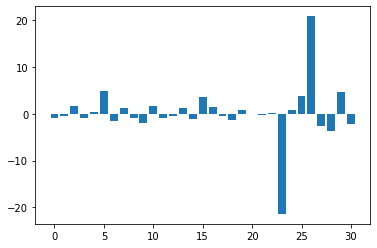

In [30]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [32]:
for i,v in enumerate(importance):
    if v > 3:
        print('Feature: %0s, Score: %.2f' % (QUEEN_train_X.columns[i],v))

Feature: food_fruit, Score: 4.90
Feature: weath_midLevel, Score: 3.51
Feature: weath_maxMeanTemp, Score: 3.79
Feature: weath_minTemp, Score: 20.84
Feature: weath_meanDayMaxWind, Score: 4.64


## Train the model

### Using the feature importance variable including the categorical `'month'`

In [36]:
# Model time! (train the model)
model = ols('waspbust_id ~ food_fruit + weath_midLevel + weath_maxMeanTemp + weath_minTemp + weath_meanDayMaxWind + C(month)', data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            waspbust_id   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     11.27
Date:                Thu, 13 May 2021   Prob (F-statistic):           3.79e-28
Time:                        00:47:44   Log-Likelihood:                -4550.8
No. Observations:                1637   AIC:                             9136.
Df Residuals:                    1620   BIC:                             9227.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.2914 

### Other discarded models

#### Using the Feature Importance variables

In [33]:
# Model time! (train the model)
model = ols('waspbust_id ~ food_fruit + weath_midLevel + weath_maxMeanTemp + weath_minTemp + weath_meanDayMaxWind', data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            waspbust_id   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     21.39
Date:                Thu, 13 May 2021   Prob (F-statistic):           8.78e-21
Time:                        00:46:07   Log-Likelihood:                -4585.2
No. Observations:                1637   AIC:                             9182.
Df Residuals:                    1631   BIC:                             9215.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9995 

#### Using all the numerical variables

In [35]:
# Model time! (train the model)
model3 = ols('waspbust_id ~ colonies_amount + food_fruit + food_apple + food_txakoli + food_kiwi + food_pear + food_blueberry + food_raspberry + freez + hum + lev_max + lev_mid + lev_min + rain + rain_1mm + rain_cum + rain_max_10 + rain_max_day + sun + temp_avg + temp_max_abs + temp_max_avg + temp_min_abs + wind_avg + wind_max + wind_max_avg + population', data=QUEEN_train).fit()
print(model3.summary())

PatsyError: Error evaluating factor: NameError: name 'freez' is not defined
    waspbust_id ~ colonies_amount + food_fruit + food_apple + food_txakoli + food_kiwi + food_pear + food_blueberry + food_raspberry + freez + hum + lev_max + lev_mid + lev_min + rain + rain_1mm + rain_cum + rain_max_10 + rain_max_day + sun + temp_avg + temp_max_abs + temp_max_avg + temp_min_abs + wind_avg + wind_max + wind_max_avg + population
                                                                                                                                       ^^^^^

#### Scaling the numerical variables resulting from feature importance

In [18]:
QUEEN_scaled = QUEEN_train_X.copy()
QUEEN_scaled['Y'] = QUEEN_train_Y
QUEEN_scaled

,year_x,municip_code,month,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,...,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population,Y
0,0.0,0.000000,0.000000,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,1
1,0.0,0.000000,0.090909,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,4
2,0.0,0.000000,0.181818,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,1
3,0.0,0.000000,0.363636,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,3
4,0.0,0.000000,0.454545,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1.0,0.997812,0.636364,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454,2
1633,1.0,0.997812,0.909091,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454,1
1634,1.0,0.997812,1.000000,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454,1
1635,1.0,1.000000,0.000000,1.0,0.000000,0.076364,0.22,0.0,0.000000,0.0,...,0.835538,0.599444,0.649755,0.611768,0.362882,0.316870,0.110781,0.099129,0.416137,2


In [19]:
model4 = ols('Y ~ food_fruit + lev_mid + rain + rain_max_day + temp_avg', data=QUEEN_scaled).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     17.13
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.52e-16
Time:                        20:40:57   Log-Likelihood:                -4595.3
No. Observations:                1637   AIC:                             9203.
Df Residuals:                    1631   BIC:                             9235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2806      0.578      5.674   

## Predict

In [37]:
prediction_y_2020 = model.predict(QUEEN_predict)
prediction_y_2020

0       1.714414
1       2.151040
2       1.705535
3       2.141309
4       2.178886
          ...   
1327    2.020263
1328    2.790065
1329    2.126182
1330    1.651477
1331    2.089641
Length: 1332, dtype: float64

## Export result to the competition-required template

In [41]:
QUEEN_predict['nests_2020'] = prediction_y_2020

In [42]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','nests_2020']].groupby(by=['municip_code','municip_name'], as_index=False).sum().dropna()
HEX.columns = ['CODIGO MUNICIPIO','NOMBRE MUNICIPIO','NIDOS 2020']

In [43]:
HEX.iloc[-1] = [48020,'Bilbao',0]

In [47]:
# Save the new dataFrame as a .csv in the current working directory
HEX.to_csv('WaspBusters_20210512_OLSmonths.csv', index=False)

# Post-analysis

In [45]:
HEX['NIDOS 2020'].sum()

4305.535286576535

In [46]:
HEX

,CODIGO MUNICIPIO,NOMBRE MUNICIPIO,NIDOS 2020
0,48001,AbadiÃ±o,31.396336
1,48002,Abanto y CiÃ©rvana-Abanto Zierbena,39.597496
2,48003,Amorebieta-Etxano,36.661317
3,48004,Amoroto,34.594393
4,48005,Arakaldo,29.510200
...,...,...,...
106,48911,Ajangiz,31.698908
107,48912,Alonsotegi,35.962187
108,48913,Zierbena,45.466236
109,48914,Arratzu,37.575959
